# Problem 3 Solutions

Here, we are discretizing the operator $\hat{A} = c(x) \frac{d^2}{dx^2}$ for functions $c(x)>0$ with Dirichlet boundary conditions $u(0)=u(L)=0$.

## part (c)

In [1]:
# construct the (M+1)xM matrix D, not including the 1/dx factor
diff1(M) = [ [1.0 zeros(1,M-1)]; diagm(ones(M-1),1) - eye(M) ]

diff1 (generic function with 1 method)

In [2]:
L = 1
M = 100
dx = L / (M+1)
D = diff1(M) / dx
x = (1:M)*dx # sequence of x values from dx to L-dx in steps of dx
C = diagm(exp(3x)) # diagonal matrix of c(x) values at the points x
A = -C * D' * D
λ, U = eig(A)
i = sortperm(λ, rev=true); # i sorts λ in descending order
λ[i] # the sorted eigenvalues

100-element Array{Float64,1}:
     -34.9733   
    -144.894    
    -328.428    
    -585.112    
    -914.507    
   -1316.09     
   -1789.23     
   -2333.18     
   -2947.11     
   -3630.03     
   -4380.88     
   -5198.43     
   -6081.39     
       ⋮        
      -3.31622e5
      -3.49889e5
      -3.6971e5 
      -3.91321e5
      -4.15014e5
 -441174.0      
      -4.70312e5
      -5.0315e5 
      -5.40759e5
      -5.84895e5
      -6.38875e5
      -7.1111e5 

In [3]:
# As expected, since A is negative-definite, all its eigenvalues are < 0
all(λ .< 0)

true

### part (i)

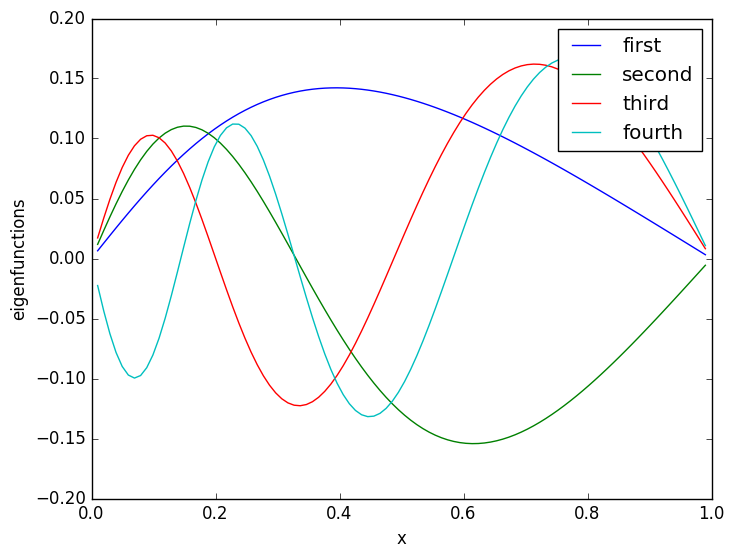

PyObject <matplotlib.legend.Legend object at 0x31e678610>

In [4]:
using PyPlot
plot(x, U[:,i[1:4]])
xlabel("x"); ylabel("eigenfunctions")
legend(["first", "second", "third", "fourth"])

### part (ii)

From our previous work, the correct dot product should be $\langle \vec{x}, \vec{y} \rangle = \vec{x}^* C^{-1} \vec{ y}$, and we can see that the first two eigenvectors are indeed orthogonal under this "weighted" inner product:

In [5]:
# verify orthogonality (up to roundoff errors)
dot(U[:,i[1]], inv(C) * U[:,i[2]])

8.88142386918549e-14

# part (d)

The eigenfunctions oscillate faster on the left-hand side where $c(x)$ is smaller, i.e. they are "squished" to the left.  Let's try to make this effect even stronger by setting
$$
c(x) = \begin{cases} 1 & x < 0.5 \\ 1000 & x \ge 0.5 \end{cases}
$$

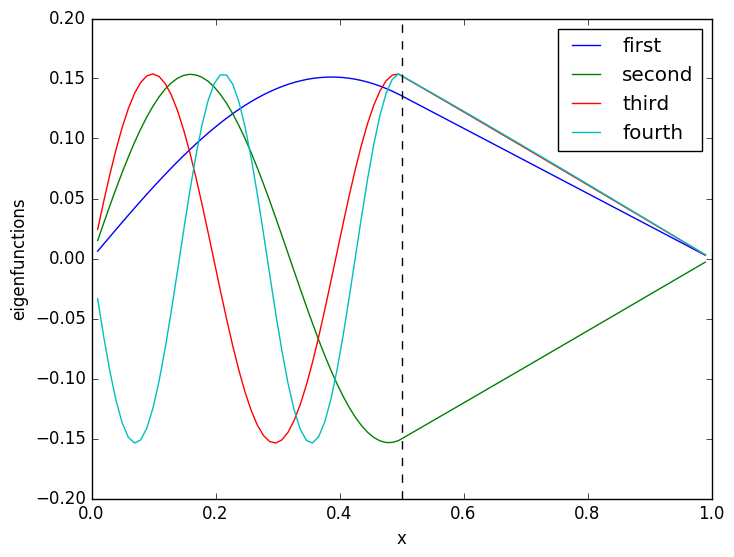

(-0.2,0.2)

In [6]:
C′ = diagm(Float64[(ξ < 0.5 ? 1 : 1000) for ξ in x]) # diagonal matrix of c(x) values at the points x
A′ = -C′ * D' * D
λ′, U′ = eig(A′)
i′ = sortperm(λ′, rev=true) # i′ sorts λ′ in descending order
plot(x, U′[:,i′[1:4]])
xlabel("x"); ylabel("eigenfunctions")
legend(["first", "second", "third", "fourth"])
plot([0.5, 0.5], [-0.2, 0.2], "k--") # a vertical dashed line at x=0.5
ylim(-0.2, 0.2)

In this extreme case, we can see that essentially *all* of the oscillations and curvature occur for $x < 0.5$, where $c$ is small.  In the $x > 0.5$ region where $c$ is large, the eigenfunctions are nearly straight lines!